# Linear Classification

In [181]:
import torch
from torch import nn
from torch.optim import Adam, SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [182]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [183]:
# Load the data
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [184]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [185]:
data.data.shape

(569, 30)

In [186]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [187]:
data.target.shape

(569,)

In [188]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [189]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.33)
N, D = X_train.shape
N, D

(381, 30)

In [190]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
# Create linear classification model class
class LinearClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(in_features=D, out_features=1)
        # self.activation = nn.Sigmoid()

    # Forward method to define the computation in the model
    def forward(self, x):
        a = self.layer(x)
        # b = self.activation(a)
        return a

In [192]:
# Getting the model
model = LinearClassificationModel()
model

LinearClassificationModel(
  (layer): Linear(in_features=30, out_features=1, bias=True)
)

In [193]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()
# Optimizer
opt = Adam(params=model.parameters(), lr=0.001)

In [194]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [195]:
X_train.dtype

torch.float32

In [196]:
y_train.dtype

torch.float32

In [197]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_test)[:5]
y_logits

tensor([[-0.4191],
        [-0.9943],
        [ 0.2121],
        [-0.7713],
        [-0.0485]])

In [198]:
y_pred_probs = torch.sigmoid(y_logits)
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [199]:
for epoch in range(100):
    model.train()
    y_logits = model(X_train)

    loss = loss_fn(y_logits, y_train.unsqueeze(1))

    opt.zero_grad()
    loss.backward()
    opt.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model(X_test)

        test_loss = loss_fn(test_logits, y_test.unsqueeze(1))


    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}')

Epoch: 0 | Loss: 0.90525 | Test Loss: 0.92951
Epoch: 10 | Loss: 0.82346 | Test Loss: 0.84604
Epoch: 20 | Loss: 0.74992 | Test Loss: 0.77034
Epoch: 30 | Loss: 0.68518 | Test Loss: 0.70294
Epoch: 40 | Loss: 0.62892 | Test Loss: 0.64367
Epoch: 50 | Loss: 0.58034 | Test Loss: 0.59198
Epoch: 60 | Loss: 0.53847 | Test Loss: 0.54706
Epoch: 70 | Loss: 0.50234 | Test Loss: 0.50804
Epoch: 80 | Loss: 0.47104 | Test Loss: 0.47405
Epoch: 90 | Loss: 0.44377 | Test Loss: 0.44432


# Linear Regression

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler

In [215]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-05-15 17:27:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-05-15 17:27:17 (44.1 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [216]:
# Load in the data
data = pd.read_csv('moore.csv', header=None)
data

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


In [217]:
data = data.values
X = data[:,0].reshape(-1, 1)
Y = data[:,1]
X[:5], Y[:5]

(array([[1971],
        [1972],
        [1973],
        [1973],
        [1974]]),
 array([2300, 3500, 2500, 2500, 4100]))

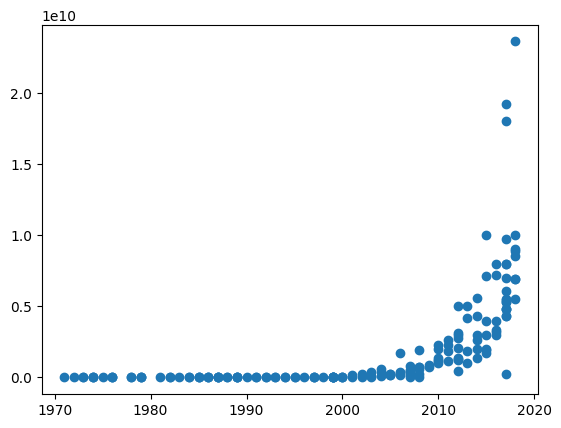

In [218]:
plt.scatter(X, Y)

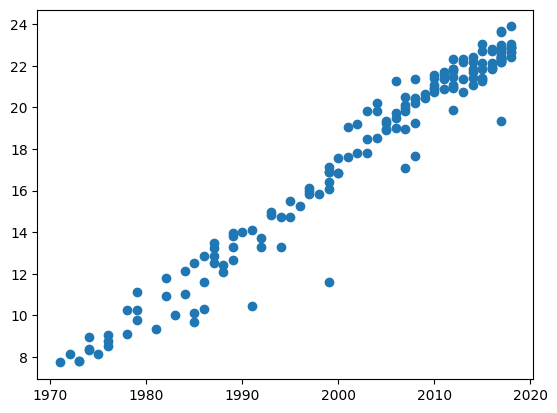

In [219]:
# Since we want a linear model, take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [220]:
# Center the X data so the values are not too large
X = X - X.mean()

In [235]:
# Creating the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(in_features=1, out_features=1)

    # Forward method to define the computation in the model
    def forward(self, x):
        a = self.layer(x)
        return a

In [236]:
# Getting the model
model = LinearRegressionModel()
model

LinearRegressionModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [237]:
# Loss function
loss_fn = nn.MSELoss()
# Optimizer
opt = SGD(params=model.parameters(), lr=0.01, momentum=0.9)

In [238]:
# Learning Rate Scheduler
scheduler = lr_scheduler.StepLR(opt, step_size=50, gamma=0.03)

In [239]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.33)

In [240]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [241]:
for epoch in range(200):
    model.train()
    y_logits = model(X_train)

    loss = loss_fn(y_logits, y_train.unsqueeze(1))

    opt.zero_grad()
    loss.backward()
    opt.step()

    scheduler.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model(X_test)

        test_loss = loss_fn(test_logits, y_test.unsqueeze(1))


    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}')

Epoch: 0 | Loss: 282.77942 | Test Loss: 290.06824
Epoch: 10 | Loss: 34.03022 | Test Loss: 31.70003
Epoch: 20 | Loss: 26.88089 | Test Loss: 29.56695
Epoch: 30 | Loss: 12.53115 | Test Loss: 8.19744
Epoch: 40 | Loss: 2.87686 | Test Loss: 3.00325
Epoch: 50 | Loss: 2.93664 | Test Loss: 2.96755
Epoch: 60 | Loss: 2.59265 | Test Loss: 2.68631
Epoch: 70 | Loss: 2.36030 | Test Loss: 2.38526
Epoch: 80 | Loss: 2.18746 | Test Loss: 2.21108
Epoch: 90 | Loss: 2.04678 | Test Loss: 2.03303
Epoch: 100 | Loss: 1.92630 | Test Loss: 1.90211
Epoch: 110 | Loss: 1.92285 | Test Loss: 1.89732
Epoch: 120 | Loss: 1.91953 | Test Loss: 1.89269
Epoch: 130 | Loss: 1.91631 | Test Loss: 1.88826
Epoch: 140 | Loss: 1.91315 | Test Loss: 1.88400
Epoch: 150 | Loss: 1.91002 | Test Loss: 1.88025
Epoch: 160 | Loss: 1.90991 | Test Loss: 1.88011
Epoch: 170 | Loss: 1.90981 | Test Loss: 1.87998
Epoch: 180 | Loss: 1.90970 | Test Loss: 1.87984
Epoch: 190 | Loss: 1.90959 | Test Loss: 1.87970
